# Fruits and Vegetable recognition

In [1]:
from fastai2.vision.all import *

In [2]:
import os
os.getcwd()

'/Users/seoung-yeji/fastai2'

In [3]:
path = Path('/Users/seoung-yeji/Data/fruit')
path.ls()

(#7) [Path('/Users/seoung-yeji/Data/fruit/.DS_Store'),Path('/Users/seoung-yeji/Data/fruit/LICENSE'),Path('/Users/seoung-yeji/Data/fruit/Test'),Path('/Users/seoung-yeji/Data/fruit/papers'),Path('/Users/seoung-yeji/Data/fruit/Training'),Path('/Users/seoung-yeji/Data/fruit/readme.md'),Path('/Users/seoung-yeji/Data/fruit/test-multiple_fruits')]

In [4]:
Path.BASE_PATH = path
path.ls()

(#7) [Path('.DS_Store'),Path('LICENSE'),Path('Test'),Path('papers'),Path('Training'),Path('readme.md'),Path('test-multiple_fruits')]

In [5]:
t_path = path/'Training'

In [6]:
t_path.ls()

(#131) [Path('Training/Tomato 4'),Path('Training/Apple Red Delicious'),Path('Training/Tomato 3'),Path('Training/Huckleberry'),Path('Training/Blueberry'),Path('Training/Pear Red'),Path('Training/Banana Lady Finger'),Path('Training/Melon Piel de Sapo'),Path('Training/Pear'),Path('Training/Cherry 1')...]

In [21]:
img = get_image_files(t_path)

In [22]:
img1 = PILImage.create(img[10])

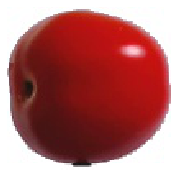

In [23]:
img1.show()

In [25]:
img

(#67692) [Path('Training/Tomato 4/r_236_100.jpg'),Path('Training/Tomato 4/247_100.jpg'),Path('Training/Tomato 4/257_100.jpg'),Path('Training/Tomato 4/r_78_100.jpg'),Path('Training/Tomato 4/r_68_100.jpg'),Path('Training/Tomato 4/r_150_100.jpg'),Path('Training/Tomato 4/r_140_100.jpg'),Path('Training/Tomato 4/131_100.jpg'),Path('Training/Tomato 4/198_100.jpg'),Path('Training/Tomato 4/18_100.jpg')...]

In [29]:
fruits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = parent_label,
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)

In [31]:
fruits.summary(t_path)

Setting-up type transforms pipelines
Found 67692 items
2 datasets of sizes 54154,13538
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/seoung-yeji/Data/fruit/Training/Peach Flat/114_100.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=100x100
  Pipeline: parent_label -> Categorize
    starting from
      /Users/seoung-yeji/Data/fruit/Training/Peach Flat/114_100.jpg
    applying parent_label gives
      Peach Flat
    applying Categorize gives
      TensorCategory(82)

Final sample: (PILImage mode=RGB size=100x100, TensorCategory(82))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode

In [30]:
dls = fruits.dataloaders(t_path)

/Users/seoung-yeji/opt/anaconda3/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


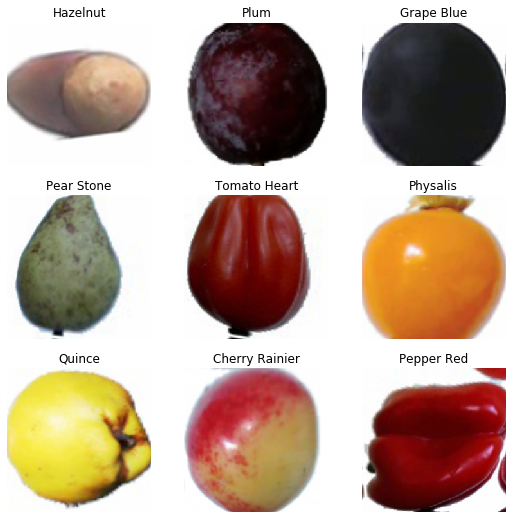

In [32]:
dls.show_batch()

In [33]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()